# Thinning Modelling

### Environment

In [1]:
from matplotlib.pyplot import cm 
import sys  
sys.path.insert(0, '/home/brunovieira/backup/Tamires_Experiments/Scripts')
import thinning_processing as tp
import thinning_modelling as tm
import thinning_explicability as te

### Data

In [2]:
paths = {
    'data_economo': "/home/brunovieira/backup/Tamires_Experiments/Data/Economo/data_894_economo.parquet",
    'dict_economo': "/home/brunovieira/backup/Tamires_Experiments/Data/Economo/dict_economo.csv",
    'data_dkt': "/home/brunovieira/backup/Tamires_Experiments/Data/DKT/data_894_dkt.parquet", 
    'dict_dkt': "/home/brunovieira/backup/Tamires_Experiments/Data/DKT/dict_dkt.csv",
    'data_bb': "/home/brunovieira/backup/Tamires_Experiments/Data/cytoarchitecture.xlsx"}

df0 = tp.read_database('DKT', paths)
df = tp.build_main_dataframe(df0, tp.reg_polynomial(df0))
df.columns

Index(['Age', 'Gender', 'handedness', 'Hemisphere', 'Lobe', 'atlas',
       'bigbrain_layer_1', 'bigbrain_layer_2', 'bigbrain_layer_3',
       'bigbrain_layer_4', 'bigbrain_layer_5', 'bigbrain_layer_6', 'area',
       'curv', 'Curvature', 'thickness', 'anual_rate', 'Thickness at 10y.o.',
       'Thickness at 80y.o.', 'thickness_mean', 'Layer I thickness',
       'Layer II thickness', 'Layer III thickness', 'Layer IV thickness',
       'Layer V thickness', 'Layer VI thickness', 'sum_thickness_layers',
       'h_structure', 'structure_name'],
      dtype='object')

## 1 - Multi Modelling
### • How a model predicting cortical thinnning performs when we use temporal and spatial variables?

3it [00:18,  6.15s/it]


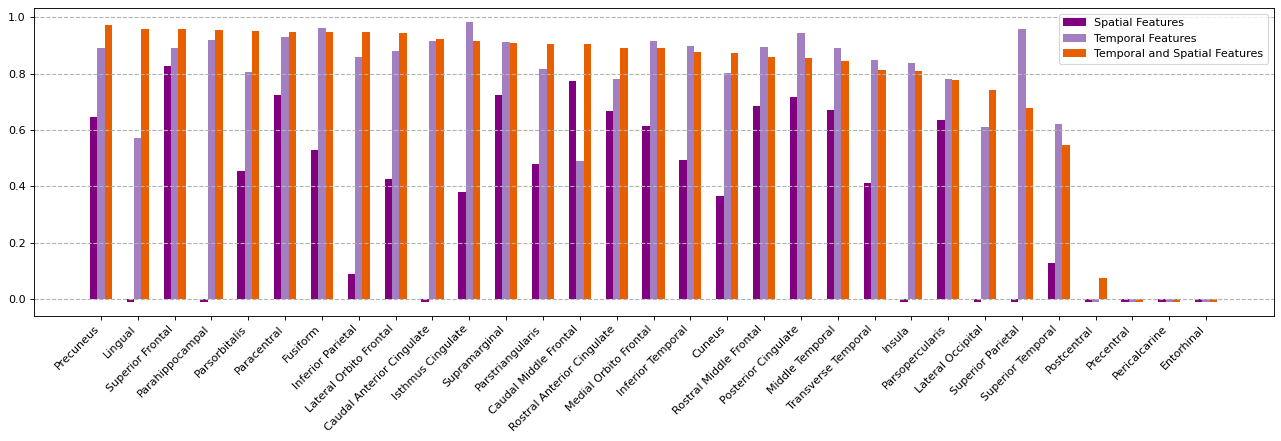

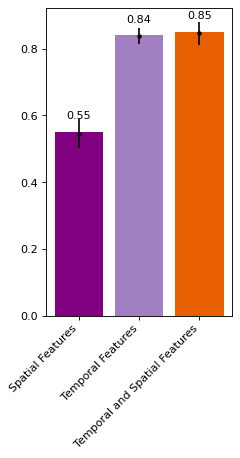

In [3]:
features_sets = [['Thickness at 10y.o.', 
                  'Curvature', 
                  'Hemisphere', 
                  'Lobe', 
                  'Layer I thickness','Layer II thickness','Layer III thickness',
                  'Layer IV thickness','Layer V thickness','Layer VI thickness'],
                 
                 ['Age'],
    
                 ['Age','Thickness at 10y.o.', 
                  'Curvature', 
                  'Hemisphere', 
                  'Lobe', 
                  'Layer I thickness','Layer II thickness','Layer III thickness',
                  'Layer IV thickness','Layer V thickness','Layer VI thickness']]

models = tm.MultiModelling(df, features_sets, atlas='DKT')
models.evaluation_results()

### • Which cortical structure thinning is better explained by which model?

In [4]:
models.df_eval_structures

atlas  r2_spatial  r2_temporal  r2_complete              structure_name
0     2.0   -0.010000     0.914909     0.924390   Caudal Anterior Cingulate
1     3.0    0.775472     0.489953     0.905489       Caudal Middle Frontal
2     5.0    0.365375     0.802241     0.874893                      Cuneus
3     6.0   -0.010000    -0.010000    -0.010000                  Entorhinal
4     7.0    0.528643     0.960891     0.947193                    Fusiform
5     8.0    0.088634     0.858828     0.946813           Inferior Parietal
6     9.0    0.492656     0.898125     0.875257           Inferior Temporal
7    10.0    0.381618     0.983556     0.915174           Isthmus Cingulate
8    11.0   -0.010000     0.610331     0.740910           Lateral Occipital
9    12.0    0.427390     0.880375     0.944785      Lateral Orbito Frontal
10   13.0   -0.010000     0.570080     0.960121                     Lingual
11   14.0    0.612879     0.915502     0.889619       Medial Orbito Frontal
12   15.0    0.672715     0.892146     0.846612             Middle Temporal
13   16.0   -0.010000     0.921155     0.953638             Parahippocampal
14   17.0    0.725903     0.930059     0.947347                 Paracentral
15   18.0    0.634359     0.780540     0.776624             Parsopercularis
16   19.0    0.455730     0.804651     0.953220               Parsorbitalis
17   20.0    0.480501     0.817131     0.906660            Parstriangularis
18   21.0   -0.010000    -0.010000    -0.010000               Pericalcarine
19   22.0   -0.010000    -0.010000     0.076579                 Postcentral
20   23.0    0.717220     0.946129     0.854078         Posterior Cingulate
21   24.0   -0.010000    -0.010000    -0.010000                  Precentral
22   25.0    0.646870     0.891096     0.973722                   Precuneus
23   26.0    0.666126     0.782036     0.891039  Rostral Anterior Cingulate
24   27.0    0.684574     0.894495     0.857497      Rostral Middle Frontal
25   28.0    0.825806     0.889810     0.959278            Superior Frontal
26   29.0   -0.010000     0.958743     0.680005           Superior Parietal
27   30.0    0.127783     0.622455     0.548111           Superior Temporal
28   31.0    0.723445     0.913914     0.910210               Supramarginal
29   34.0    0.411912     0.848724     0.812254         Transverse Temporal
30   35.0   -0.010000     0.836666     0.808333                      Insula

### • Database that summarizes the cortical structure information acquired in the models

In [5]:
models.summarize_info().head() #path='../Data/Economo/'

atlas  Hemisphere  Lobe  Thickness at 10y.o.  Thickness at 80y.o.  \
0   10.0         0.0   5.0                 2.79                 2.31   
1   10.0         1.0   5.0                 2.71                 2.32   
2   11.0         0.0   4.0                 2.38                 2.03   
3   11.0         1.0   4.0                 2.46                 2.02   
4   12.0         0.0   1.0                 3.07                 2.44   

   Curvature  Layer I thickness  Layer II thickness  Layer III thickness  \
0   0.027868           0.265759            0.209925             0.683139   
1  -0.316633           0.266913            0.213113             0.686479   
2  -1.789133           0.246774            0.217012             0.626959   
3  -1.538292           0.252469            0.222896             0.642910   
4  -0.786044           0.289976            0.232227             0.759549   

   Layer IV thickness  ...  bigbrain_layer_3  bigbrain_layer_4  \
0            0.238146  ...          0.279849          0.097589   
1            0.244217  ...          0.280475          0.099777   
2            0.232772  ...          0.282962          0.105053   
3            0.230441  ...          0.284433          0.101951   
4            0.189658  ...          0.277294          0.069240   

   bigbrain_layer_5  bigbrain_layer_6  Global thinning  \
0          0.207884          0.219806             0.48   
1          0.206124          0.217499             0.39   
2          0.198371          0.204295             0.35   
3          0.199737          0.203571             0.44   
4          0.221332          0.241490             0.63   

   Global thinning normalized  r2_spatial  r2_temporal  r2_complete  \
0                    0.172043    0.381618     0.983556     0.915174   
1                    0.143911    0.381618     0.983556     0.915174   
2                    0.147059   -0.010000     0.610331     0.740910   
3                    0.178862   -0.010000     0.610331     0.740910   
4                    0.205212    0.427390     0.880375     0.944785   

           structure_name  
0       Isthmus Cingulate  
1       Isthmus Cingulate  
2       Lateral Occipital  
3       Lateral Occipital  
4  Lateral Orbito Frontal  

[5 rows x 24 columns]

## 2 - Variable roles in cortical thinning

### • Which features are more important and how they contribute to the model in summary?

100%|███████████████████████████████████████████| 27/27 [25:39<00:00, 57.01s/it]


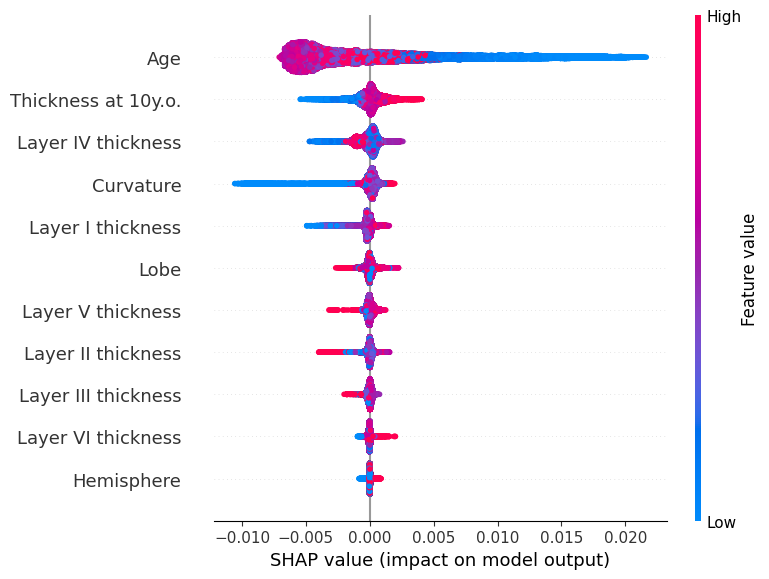

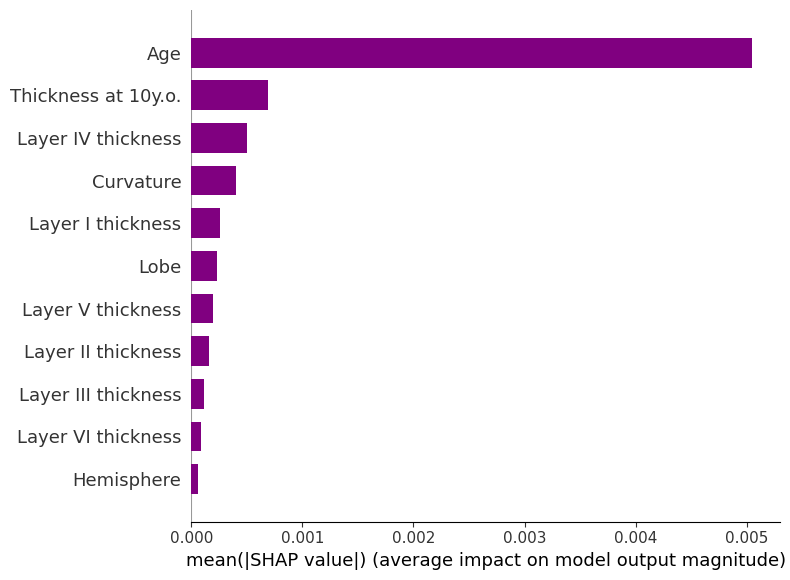

In [6]:
shap_explicability = te.ShapExplicability(models.X_train, models.lgbm, models.df_eval_structures, features_sets, features_set=2)
shap_explicability.summary()


### • Does the variables interact with each other on the model?

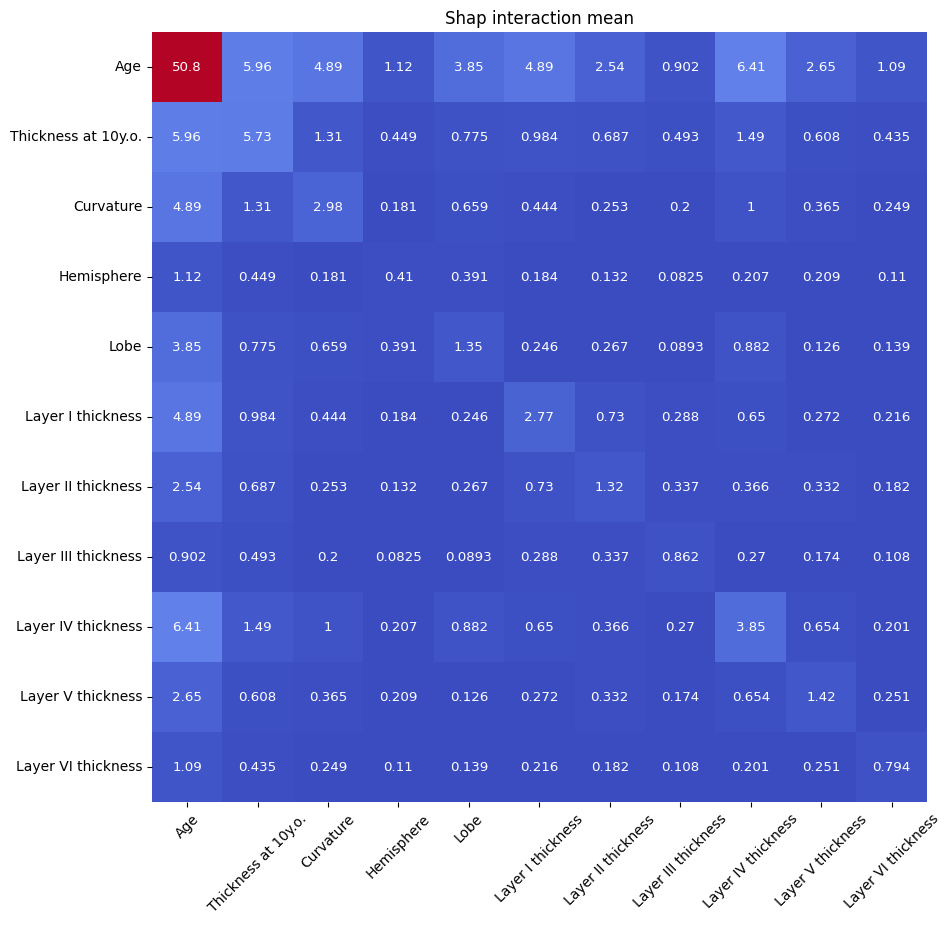

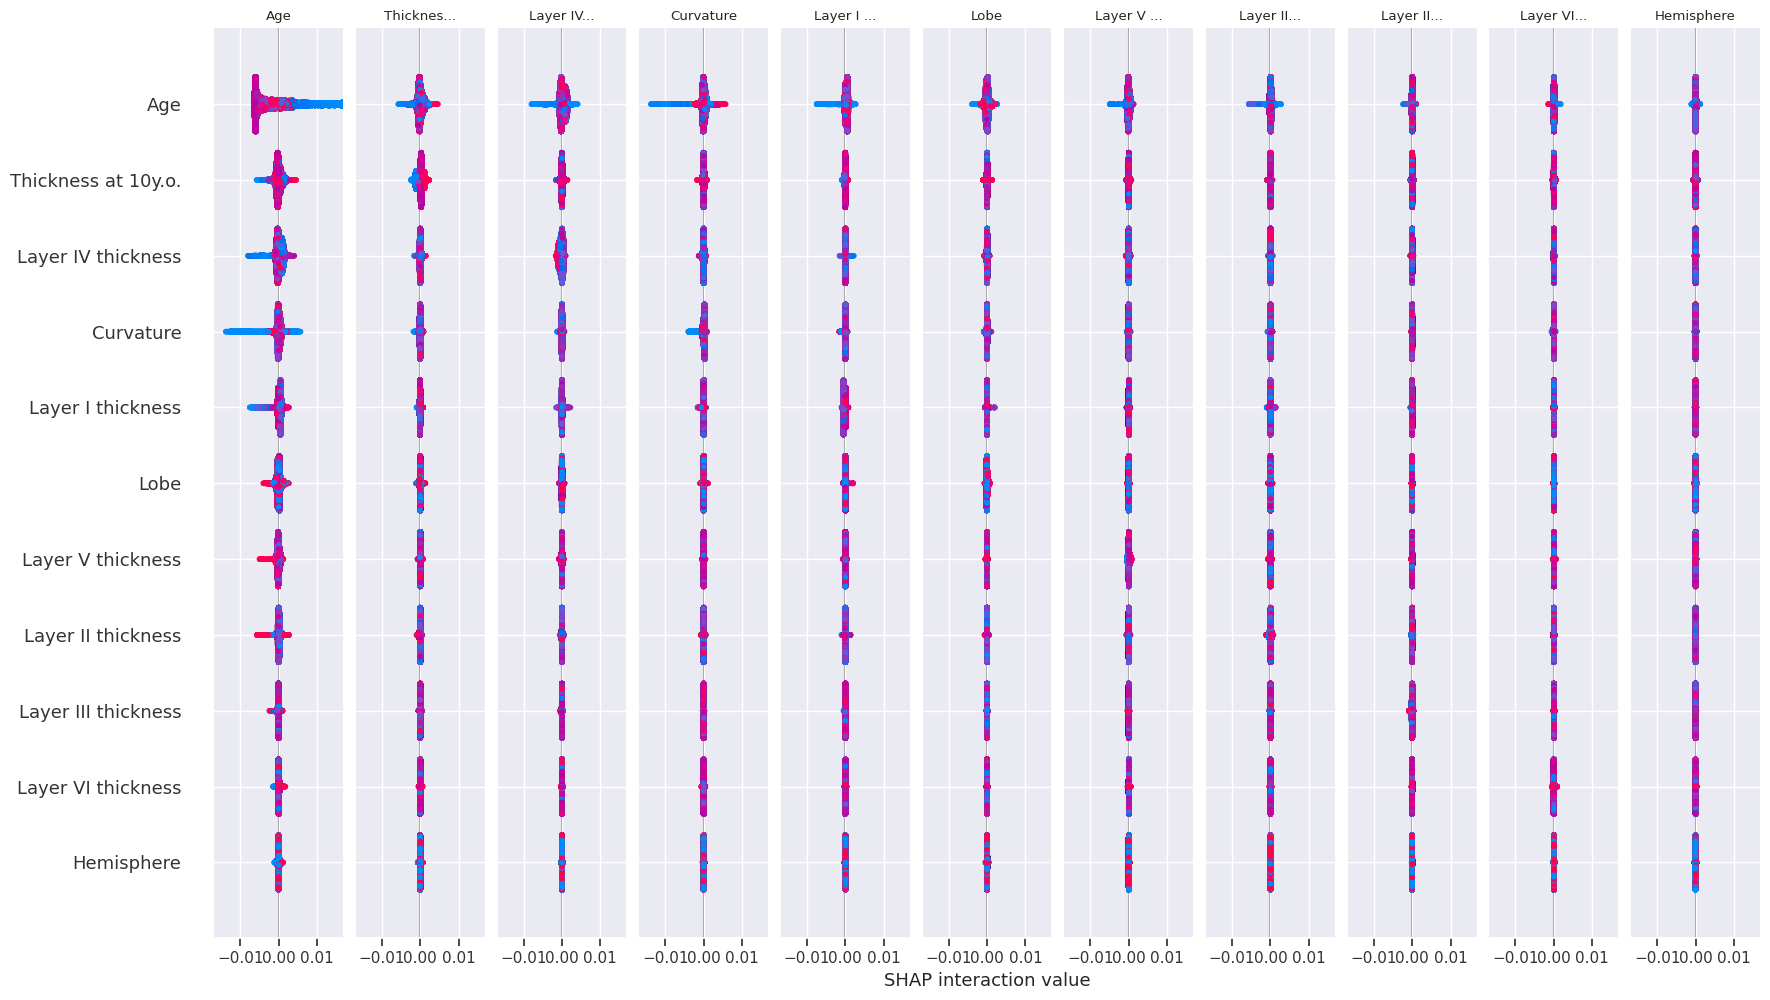

In [7]:
shap_explicability.interaction_matrices()

### • How each variable contribute to the model?

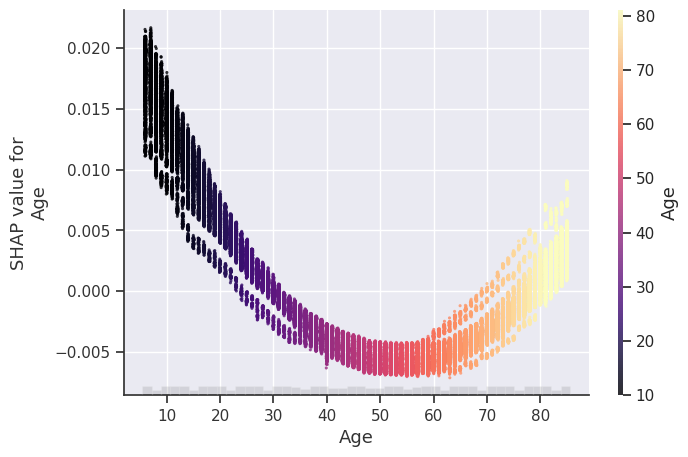

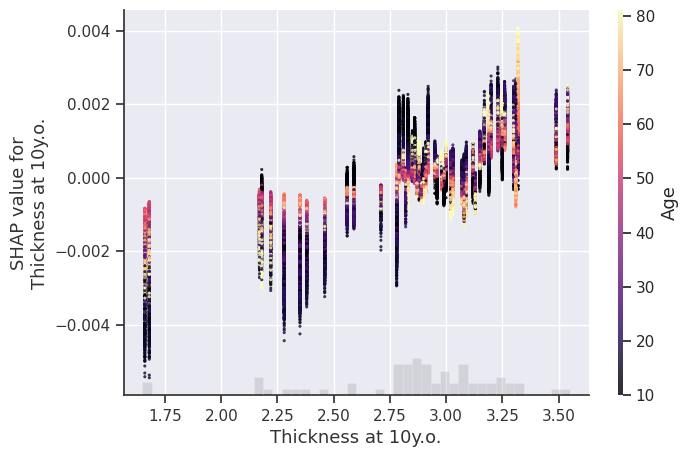

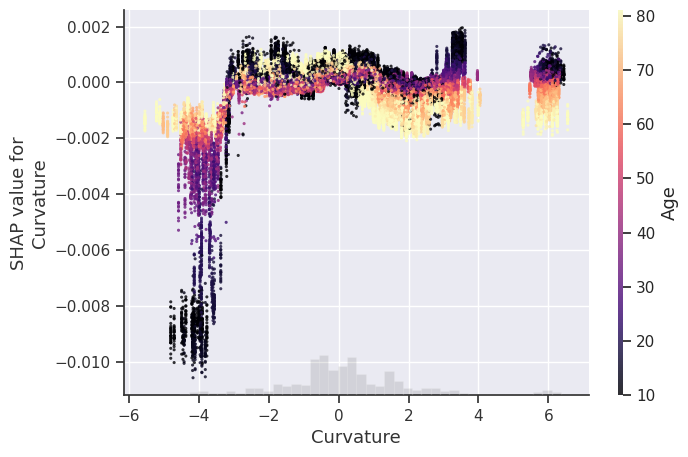

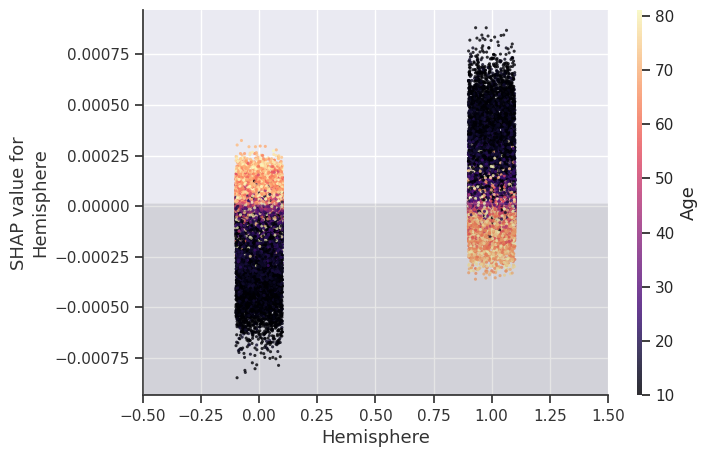

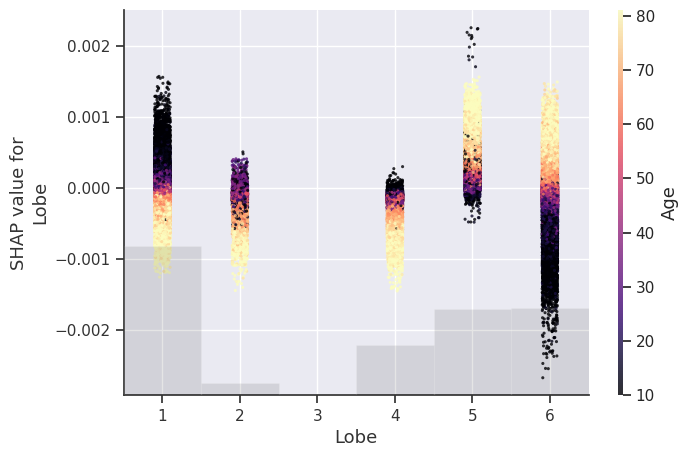

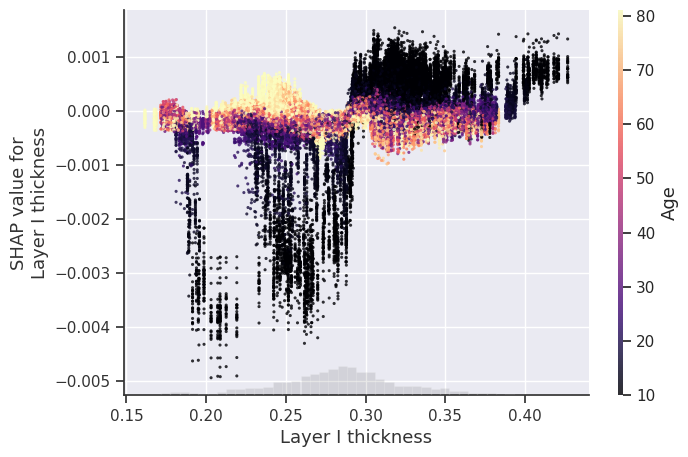

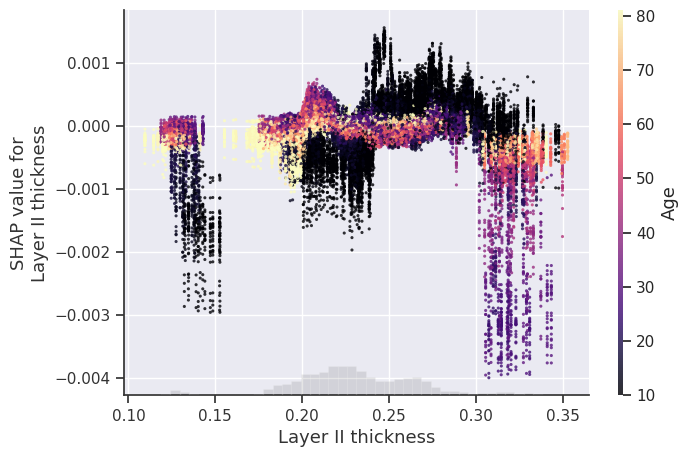

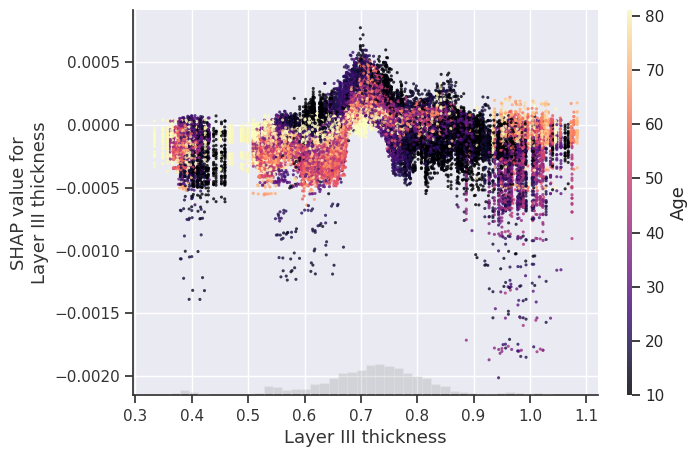

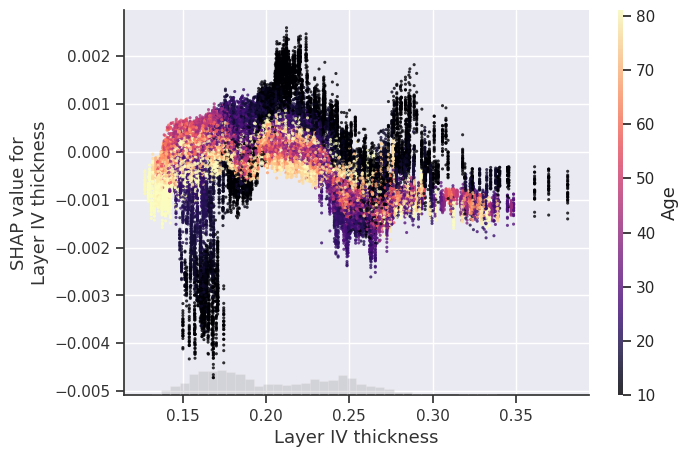

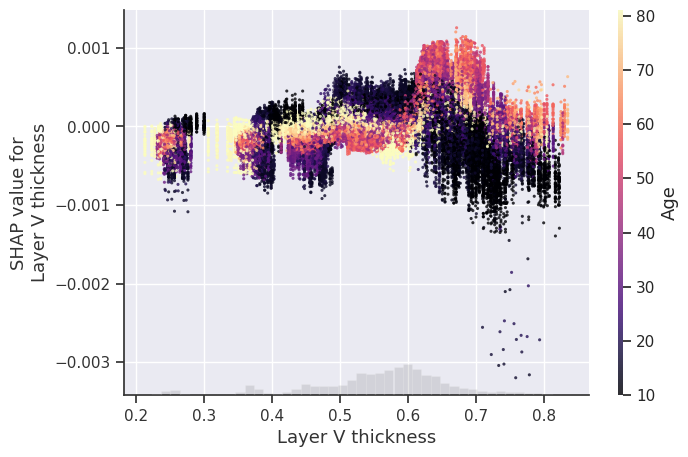

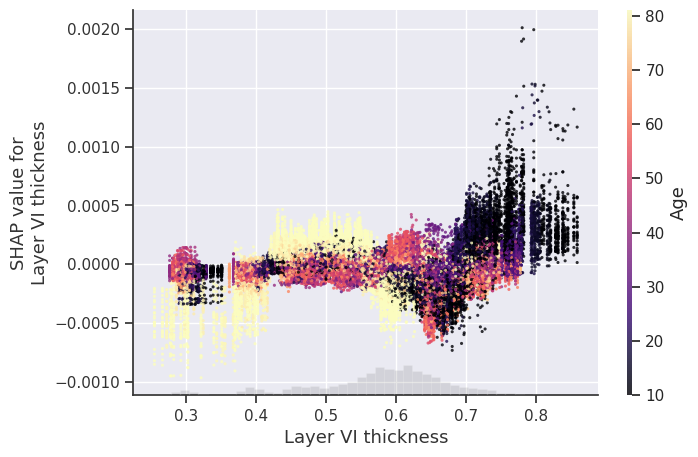

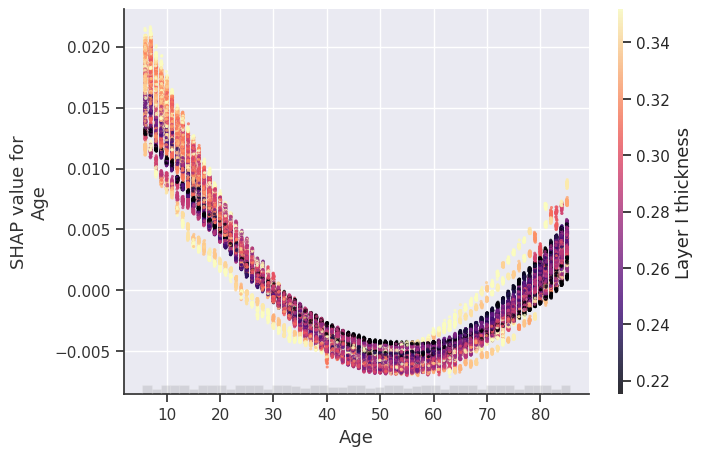

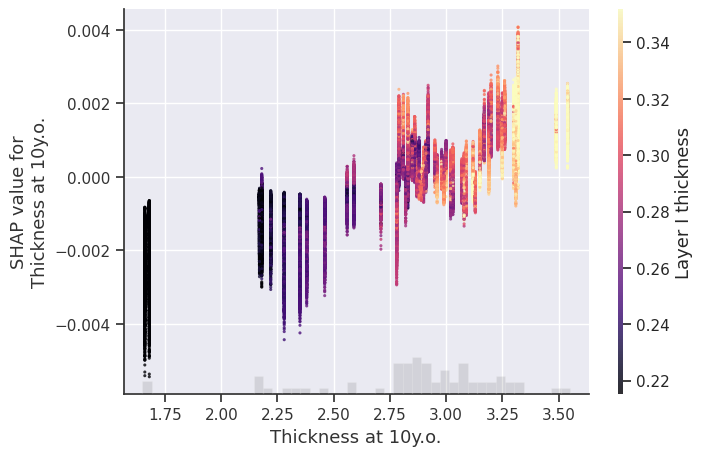

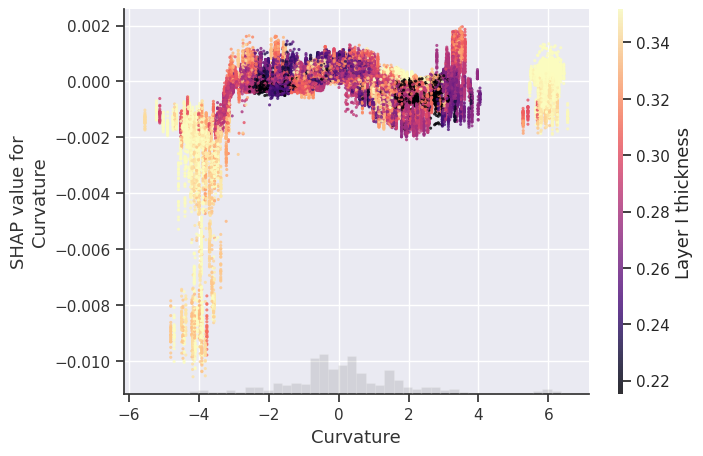

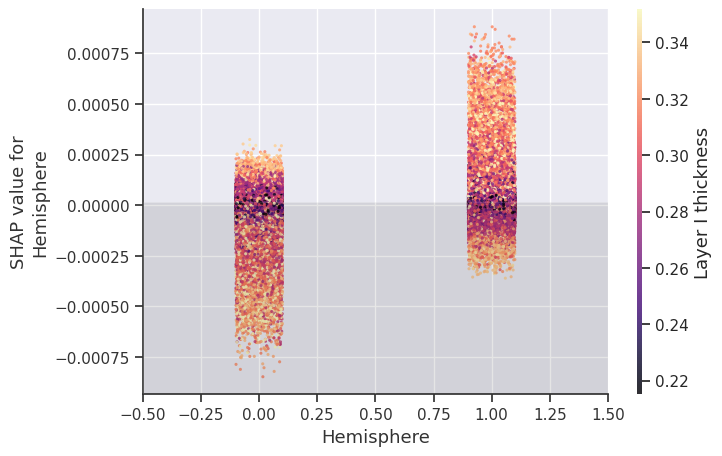

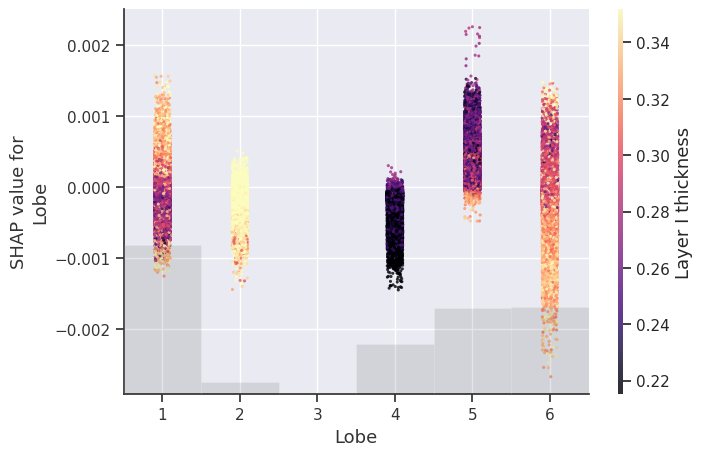

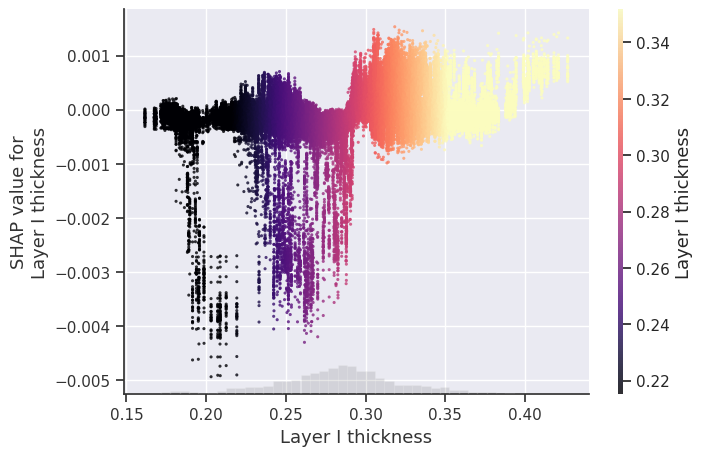

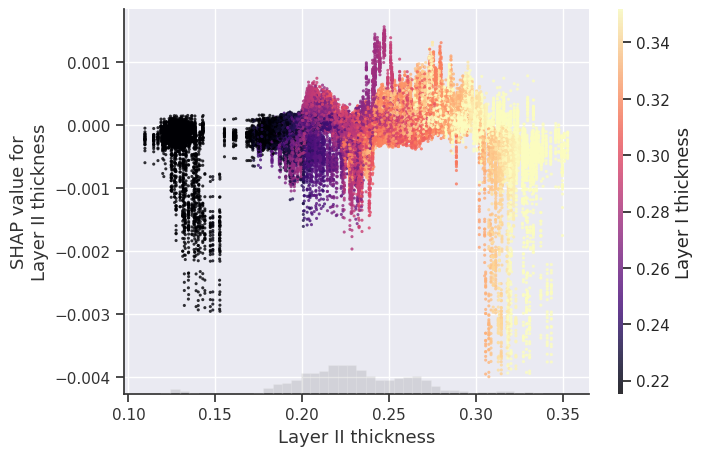

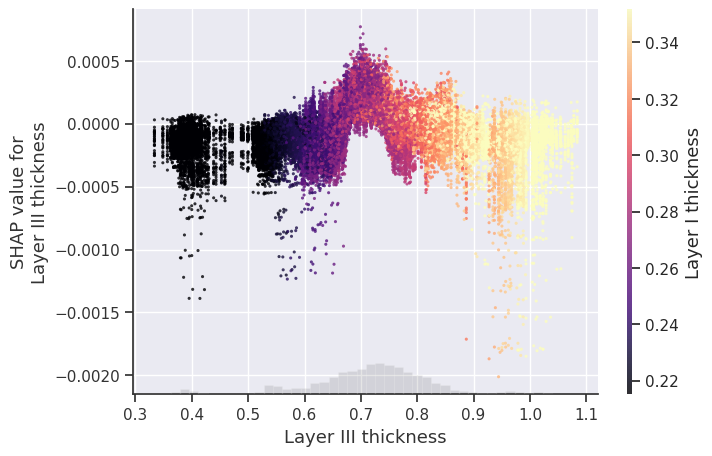

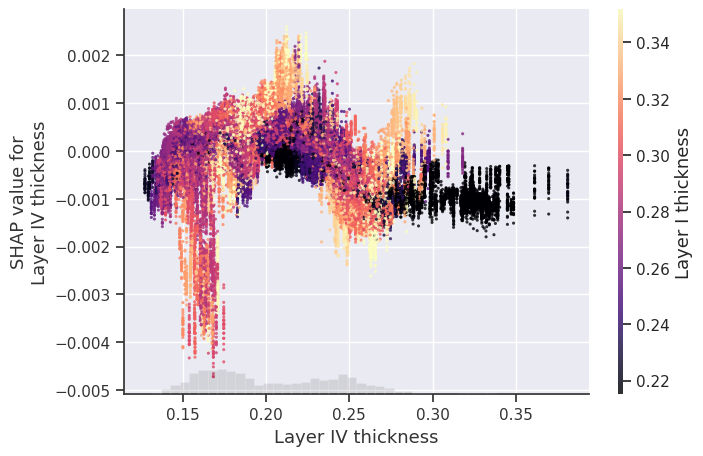

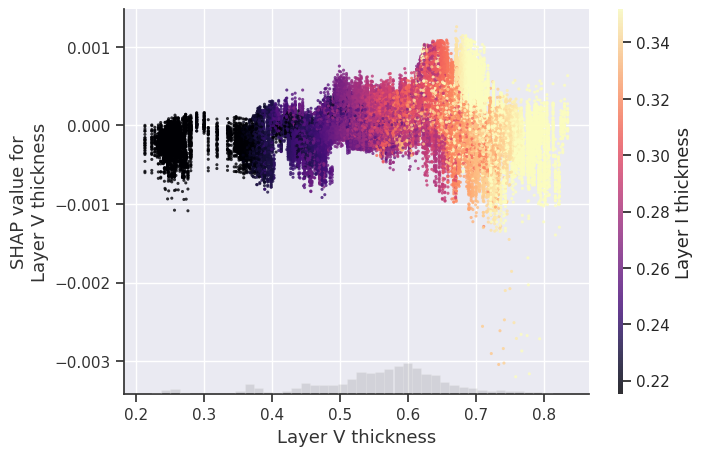

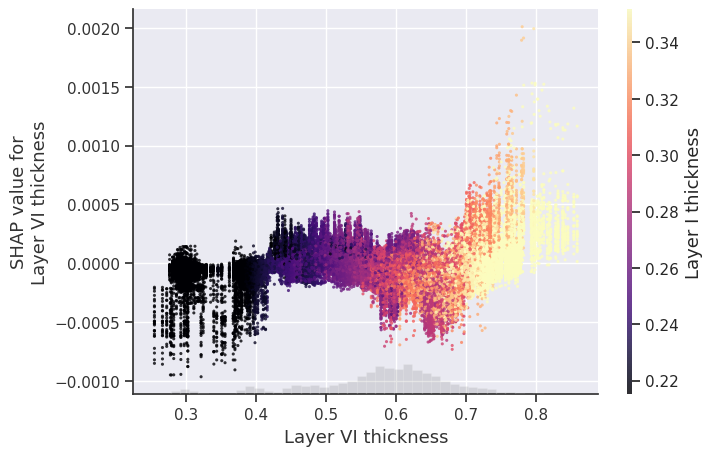

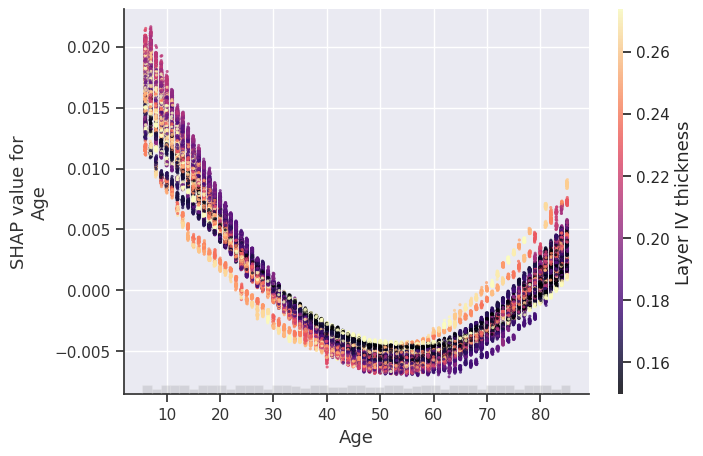

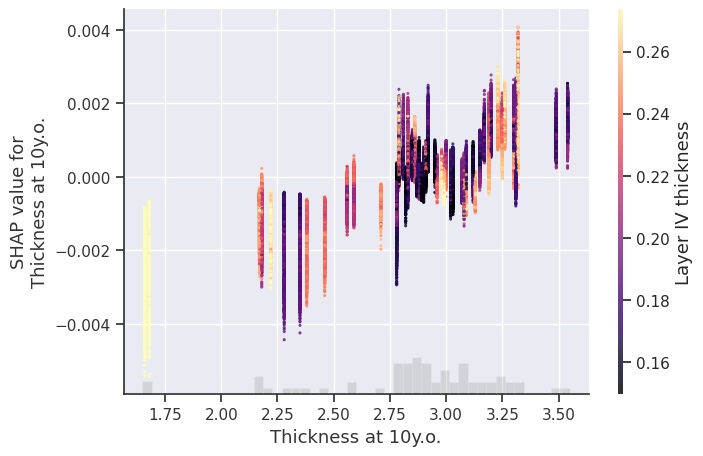

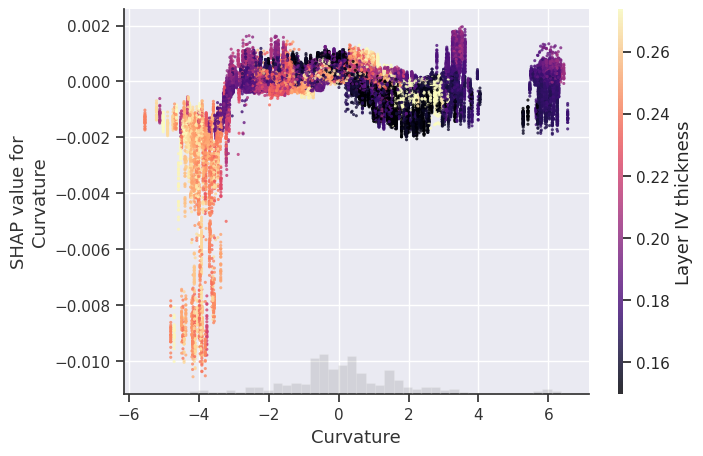

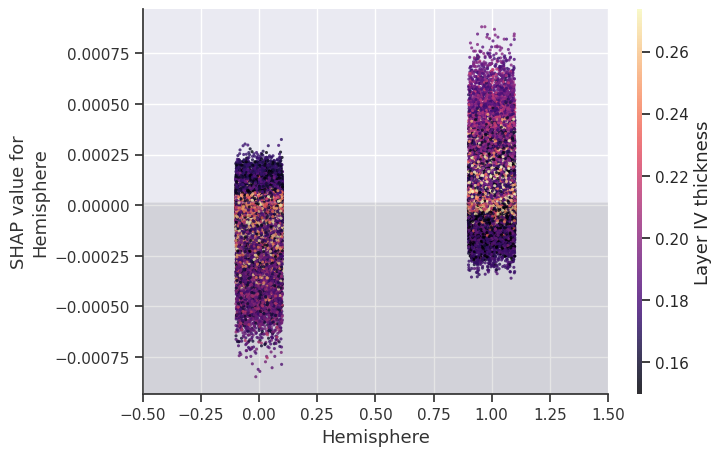

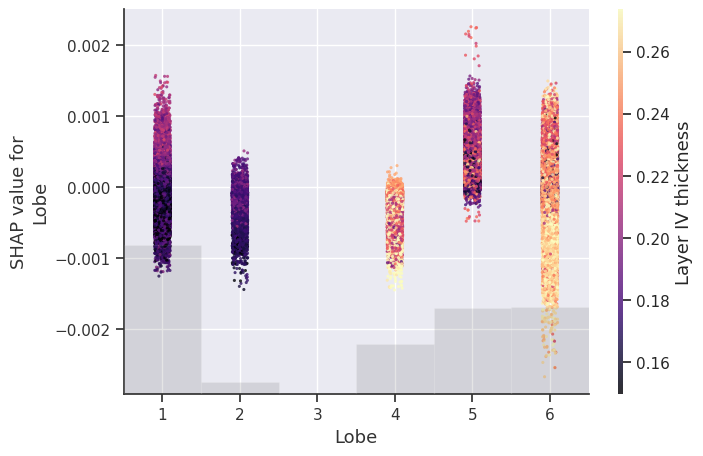

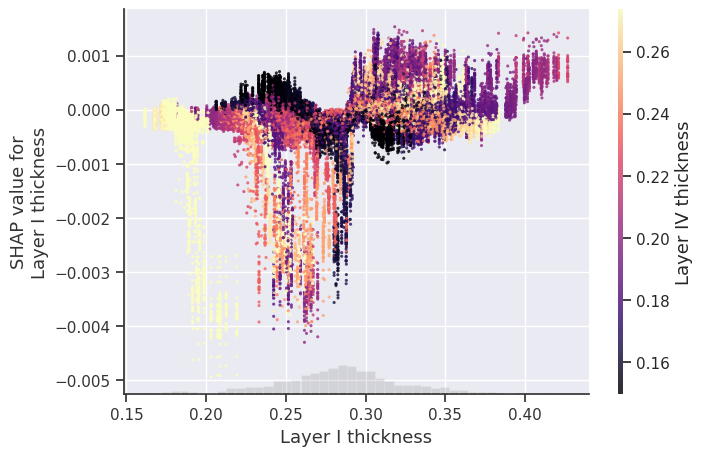

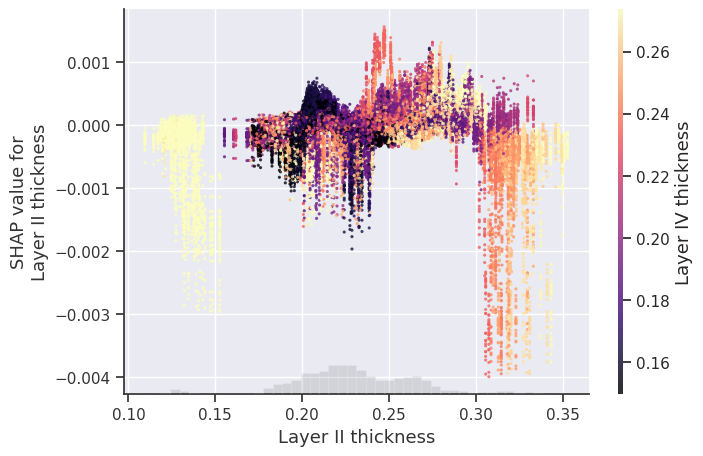

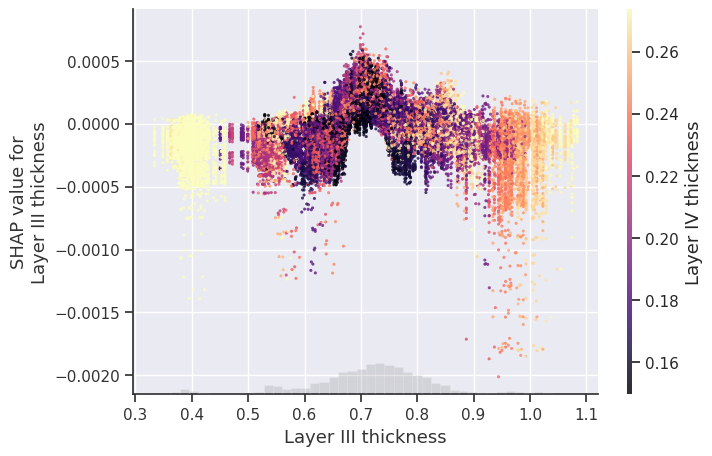

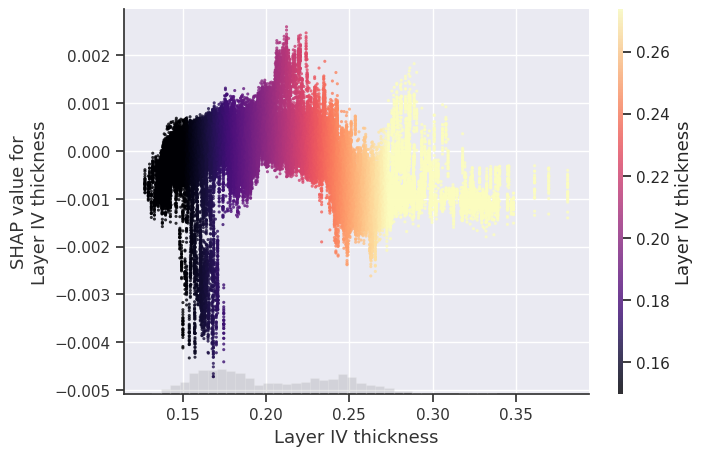

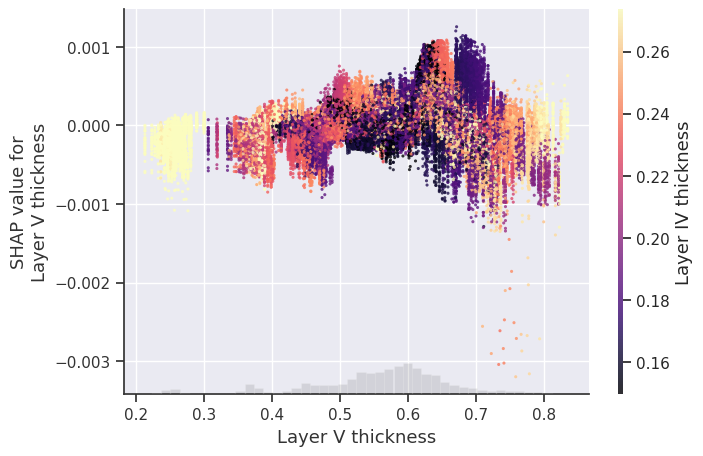

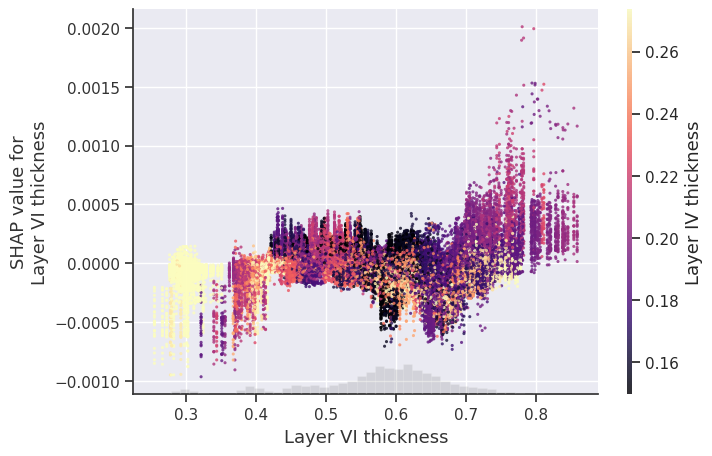

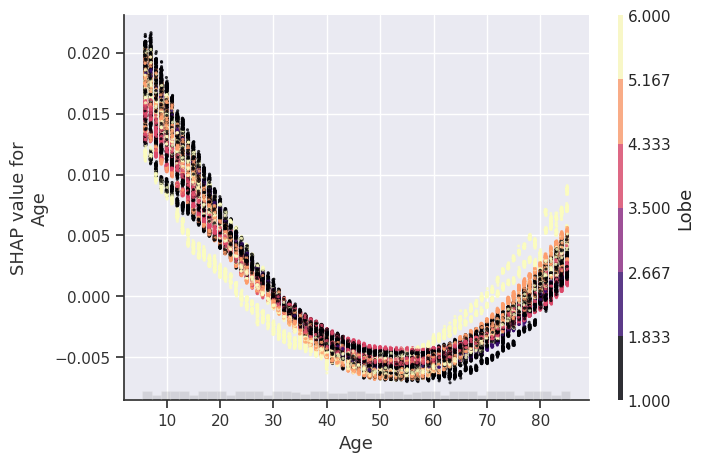

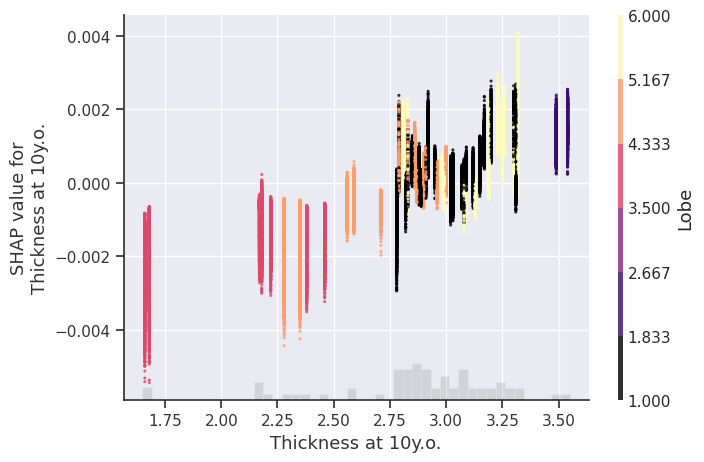

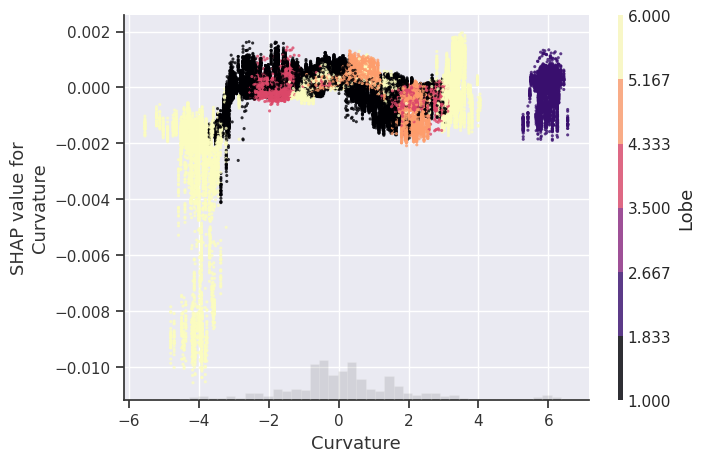

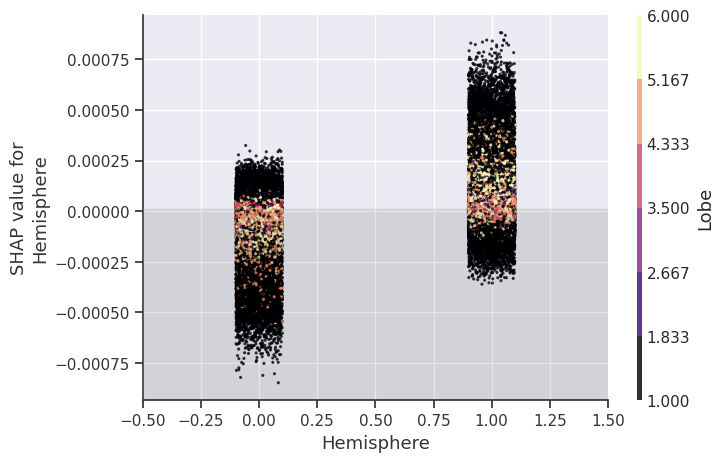

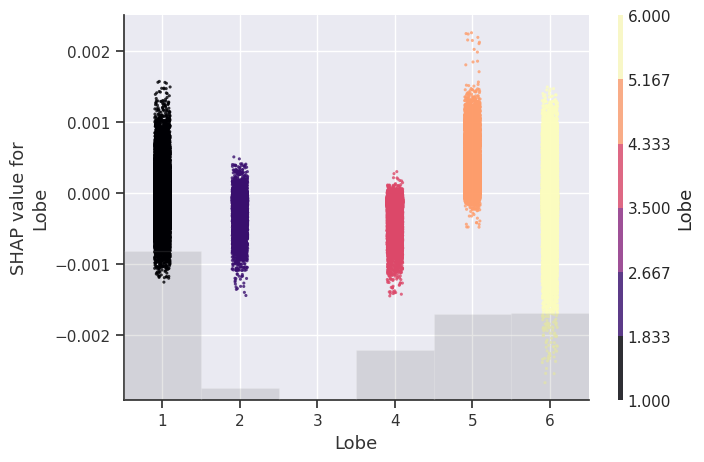

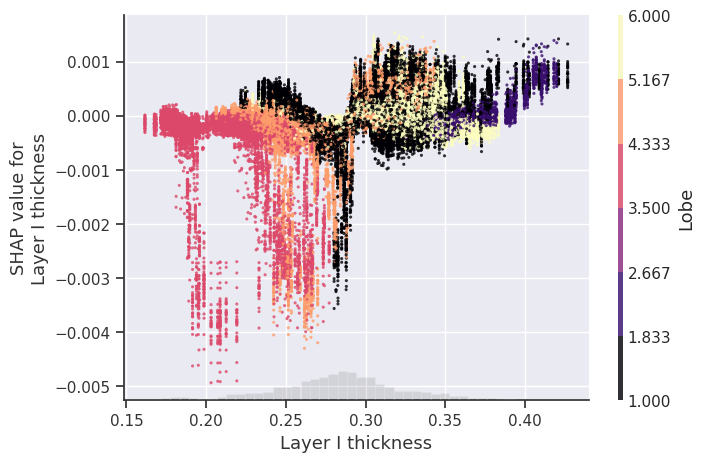

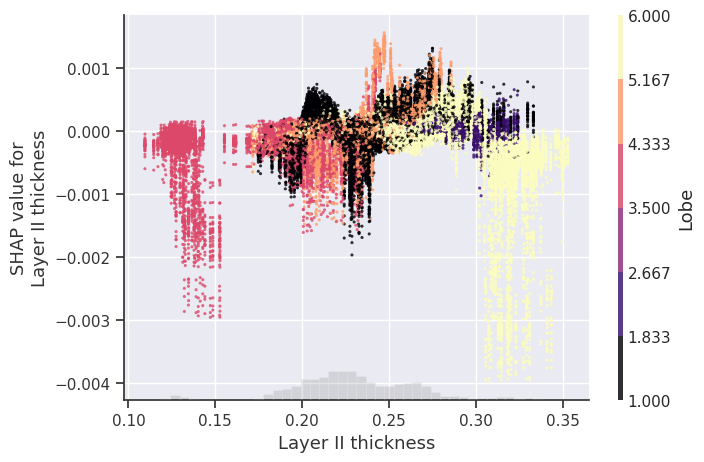

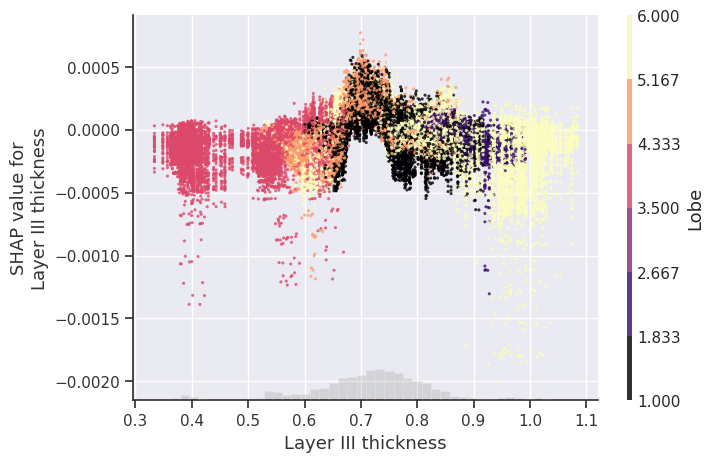

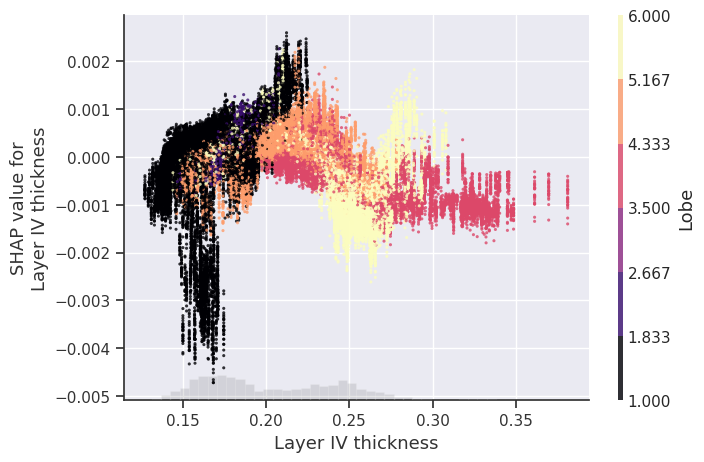

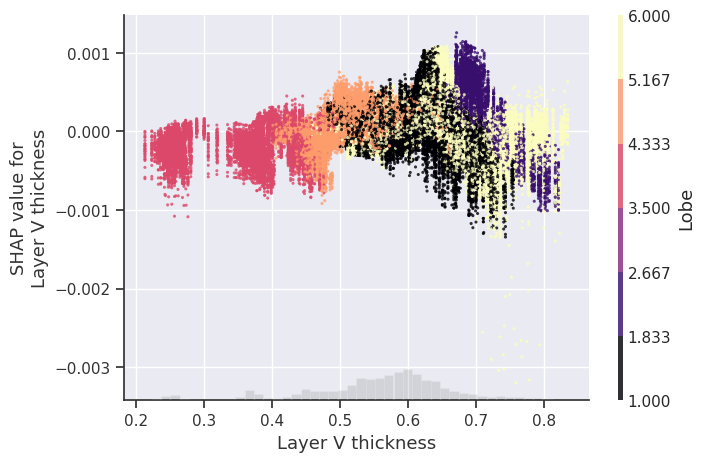

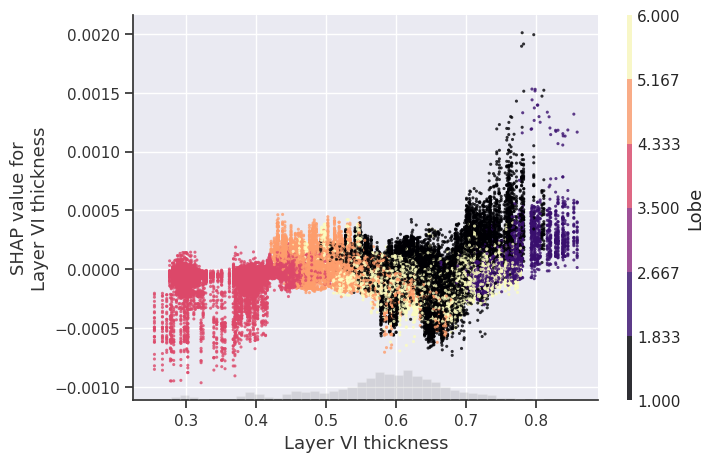

In [8]:
highly_interactive_features = [['Age', cm.magma],
                               ['Layer I thickness', cm.magma],
                               ['Layer IV thickness', cm.magma],
                               ['Lobe', cm.magma]]

for [feature, cmap] in highly_interactive_features:
    shap_explicability.scatter(feature, cmap = cmap)